In [1]:
import re   
import nltk   
import string 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from nltk.stem.porter import PorterStemmer

from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud 

pd.set_option('display.max_colwidth', 200)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
''' Leitura do data-set e nomenclatura das colunas. '''
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1')

columns_names = ['target', 'ids', 'date', 'flag', 'user', 'tweet']
df.columns = columns_names

df.drop(['ids', 'date', 'flag', 'user'], axis=1, inplace=True)

df.head()

,target,tweet
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew


In [3]:
''' Extraindo duas partições de dados, uma com 25.000 tweets felizes e outra com 20.000 tweets tristes respectivamente. '''
positive_data = df[df.target == 4].iloc[:25000,:]
negative_data = df[df.target == 0].iloc[:20000,:]

df = pd.concat([positive_data, negative_data], axis=0)

print(positive_data.shape)
print(negative_data.shape)
print(df.shape)

(25000, 2)
(20000, 2)
(45000, 2)


In [4]:
''' Limpando os tweets, removendo caracteres comuns, stopwords e simplificando as palavras restantes com o PorterStemmer. '''
stemmer = PorterStemmer() 
stopwords = nltk.corpus.stopwords.words('english')

remove_stopwords_cb = lambda tweet: ' '.join([word for word in tweet.split() if word not in stopwords])
  
df['clean_tweet'] = df['tweet'].str.replace("@", "")
df['clean_tweet'] = df['clean_tweet'].str.replace(r"http\S+", "")
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z]", " ")

df['clean_tweet'] = df['clean_tweet'] \
  .apply(lambda tweet_item: remove_stopwords_cb(tweet_item.lower())) \
  .apply(lambda tweet_item: tweet_item.split()) \
  .apply(lambda tweet_item: [stemmer.stem(word) for word in tweet_item]) \
  .apply(lambda tweet_item: ' '.join([word for word in tweet_item])) \
  .apply(lambda tweet_item: ' '.join([word for word in tweet_item.split() if len(word) > 3]))

df.head()

,target,tweet,clean_tweet
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpet best
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,meet besti tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter sunisa meet show area sweetheart
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much real food friend make soup
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon


In [5]:
''' Aplicando o CountVectorizer e Separando dados de treino e teste. '''
count_vectorizer = CountVectorizer(stop_words='english') 
x = count_vectorizer.fit_transform(df['clean_tweet'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [10]:
''' Aplicando o modelo MLP. '''
mlp_model = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50), 
    max_iter=300, 
    activation='relu',
    solver='adam',
)
mlp_model.fit(x_train, y_train)
mlp_y_predicted = mlp_model.predict(x_test)

f'MLPClassifier score: {accuracy_score(mlp_y_predicted, y_test)}'

'MLPClassifier score: 0.7033333333333334'

In [9]:
''' Aplicando o modelo RandomForest. '''
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(x_train, y_train)
rf_y_predicted = rf_model.predict(x_test)

f'RandomForestClassifier score: {accuracy_score(rf_y_predicted, y_test)}'

'RandomForestClassifier score: 0.7121111111111111'

In [16]:
''' Aplicando o modelo LogisticRegression. '''
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
lr_y_predicted = lr_model.predict(x_test)

f'LogisticRegression score: {accuracy_score(lr_y_predicted, y_test)}'

'LogisticRegression score: 0.7226666666666667'

In [14]:
''' Aplicando o modelo KNeighborsClassifier. '''
knn_model = KNeighborsClassifier(n_neighbors=500)
knn_model.fit(x_train, y_train.values.ravel())
knn_y_predicted = knn_model.predict(x_test)

f'KNeighborsClassifier score: {accuracy_score(knn_y_predicted, y_test)}'

'KNeighborsClassifier score: 0.6467777777777778'

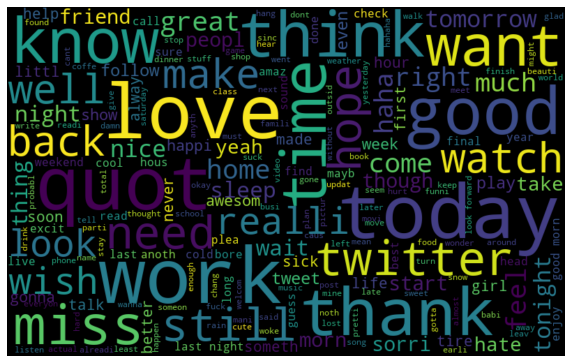

In [7]:
''' Wordcloud do conjunto inteiro de dados. '''
all_words = ' '.join([text for text in df['clean_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.show()

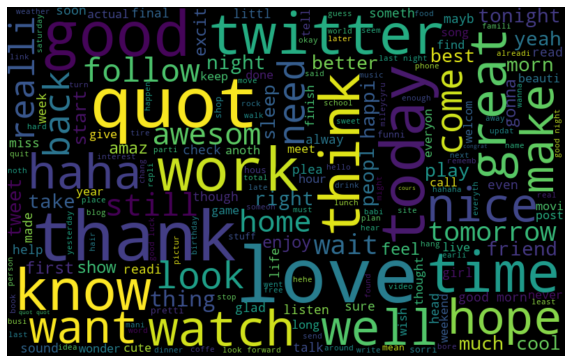

In [8]:
''' Wordcloud do conjunto de dados positivos. '''
positive_words =' '.join([text for text in df['clean_tweet'][df['target'] == 4]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.show()

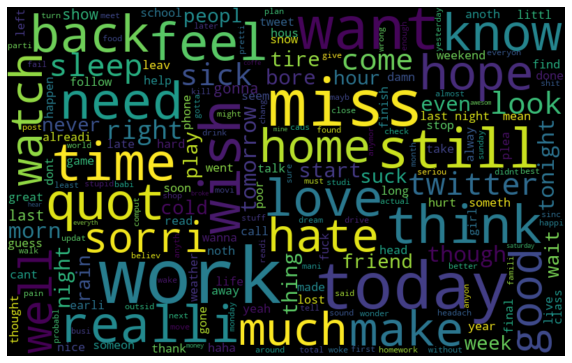

In [9]:
''' Wordcloud do conjunto de dados negativos. '''
negative_words = ' '.join([text for text in df['clean_tweet'][df['target'] == 0]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.show()